In [1]:
#Dataset 1 for E-commerce Customer Behavior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#file
data1 = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")


#Drop customer ID and fill missing values
data1 = data1.drop(columns=["Customer ID"])
data1["Satisfaction Level"].fillna(data1["Satisfaction Level"].mode()[0], inplace=True)

#encoding categorical variables
data1["Gender"] = data1["Gender"].map({"Male": 0, "Female": 1})
data1["Membership Type"] = data1["Membership Type"].map({"Bronze": 0, "Silver": 1, "Gold": 2})
data1["Satisfaction Level"] = data1["Satisfaction Level"].map({"Neutral": 0, "Satisfied": 1, "Unsatisfied": 2})

#map city to numbers
city_mapping = {city: i for i, city in enumerate(data1["City"].unique())}
data1["City"] = data1["City"].map(city_mapping)

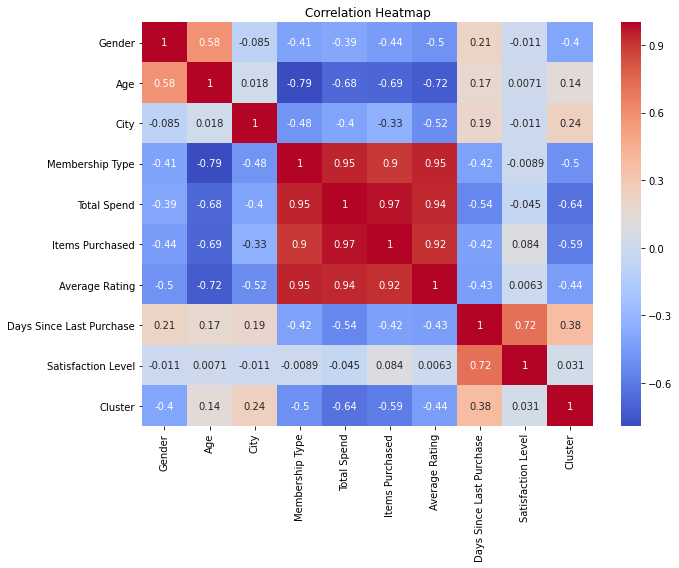

In [12]:
#correlation heatmap for data1
plt.figure(figsize=(10, 8))
sns.heatmap(data1.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#This heatmap displays how strongly numerical features relate to each other. 
#Darker colors and higher numbers mean stronger correlation.


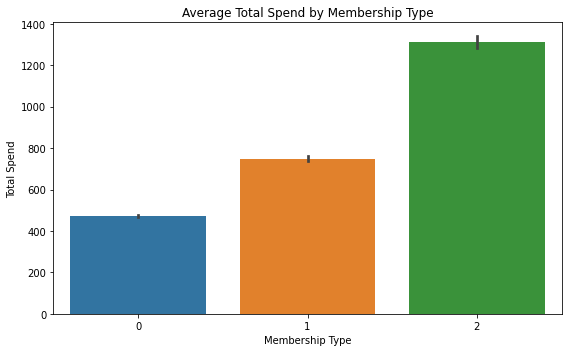

In [4]:
#spending by membership type graph
plt.figure(figsize=(8, 5))
sns.barplot(x="Membership Type", y="Total Spend", data=data1)
plt.title("Average Total Spend by Membership Type")
plt.tight_layout()
plt.savefig("graph_spend_by_membership.png")
plt.show()

#This bar plot compares average spending across different membership levels.

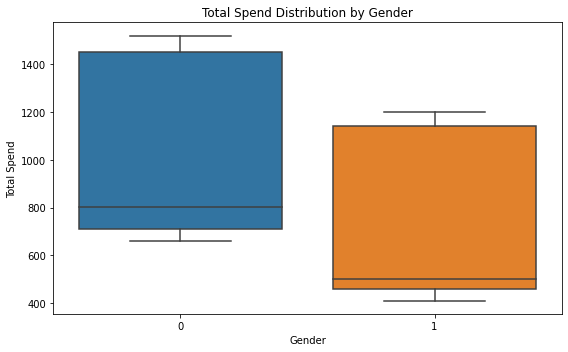

In [5]:
#spending by gender graph
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Total Spend", data=data1)
plt.title("Total Spend Distribution by Gender")
plt.tight_layout()
plt.savefig("graph_spend_by_gender.png")
plt.show()

#A boxplot showing how spending varies between male and female customers.

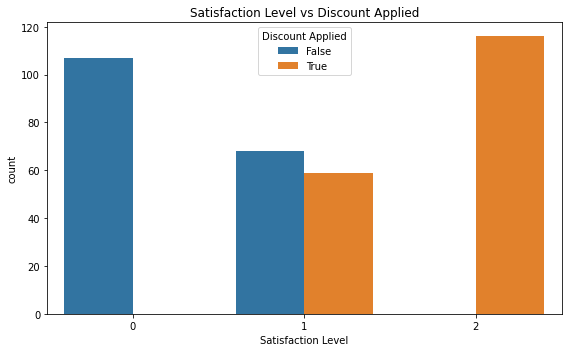

In [6]:
#satisfaction based on discount graph
plt.figure(figsize=(8, 5))
sns.countplot(x="Satisfaction Level", hue="Discount Applied", data=data1)
plt.title("Satisfaction Level vs Discount Applied")
plt.tight_layout()
plt.savefig("graph_satisfaction_discount.png")
plt.show()

#A countplot comparing satisfaction levels for customers who received discounts vs those who didn’t.

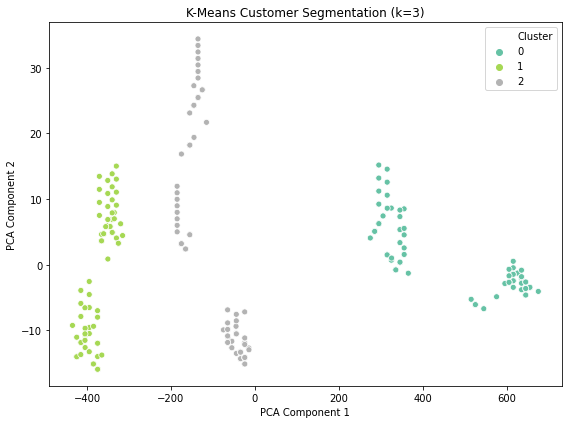

In [8]:
#Kmeans clustering from data1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Remove target column
X_cluster = data1.drop(columns=["Satisfaction Level"])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data1["Cluster"] = kmeans.fit_predict(X_cluster)

# PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_cluster)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=data1["Cluster"], palette="Set2")
plt.title("K-Means Customer Segmentation (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.savefig("graph_kmeans_clusters.png")
plt.show()

#This scatterplot visualizes customer groups identified by the K-means clustering algorithm.

#The X axis is dominated by amount spent and a little bit by number of items
#the Y axis is dominated by days since last purchase and age

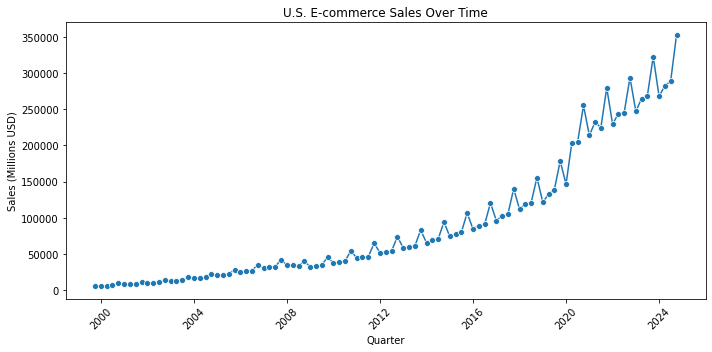

In [10]:
#data set 2 and graph from it 
ecomnsa_df = pd.read_excel("ECOMNSA.xlsx", sheet_name="Quarterly")

plt.figure(figsize=(10, 5))
sns.lineplot(data=ecomnsa_df, x="observation_date", y="ECOMNSA", marker="o")
plt.title("U.S. E-commerce Sales Over Time")
plt.xlabel("Quarter")
plt.ylabel("Sales (Millions USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("graph_ecom_trend.png")
plt.show()

#A line graph showing how national e-commerce sales have grown from 1999 to 2024.

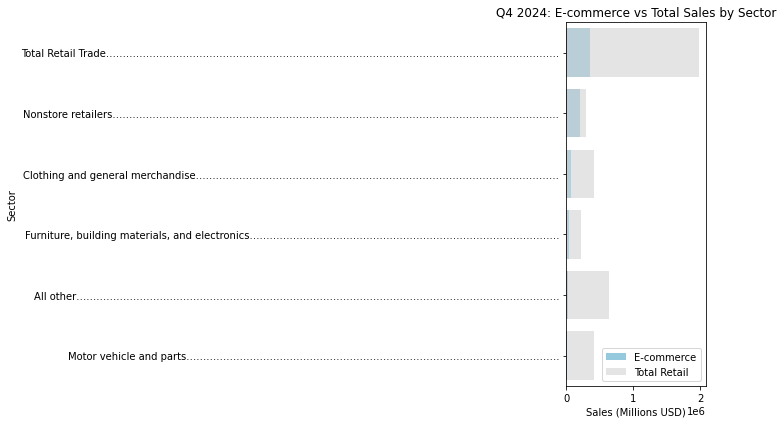

In [11]:
#data set 3 cleaning and visual
supp = pd.read_excel("24q4supptables.xlsx", sheet_name="Supplemental table Total & EC", skiprows=5)

supp = supp.rename(columns={
    supp.columns[0]: "Kind of Business",
    supp.columns[1]: "2024Q4_Total",
    supp.columns[2]: "2024Q4_Ecommerce"
})

supp = supp[supp["Kind of Business"].notna()]
supp = supp[~supp["2024Q4_Total"].isin(['*'])]
supp = supp[["Kind of Business", "2024Q4_Total", "2024Q4_Ecommerce"]]
supp["2024Q4_Total"] = pd.to_numeric(supp["2024Q4_Total"], errors='coerce')
supp["2024Q4_Ecommerce"] = pd.to_numeric(supp["2024Q4_Ecommerce"], errors='coerce')
supp = supp.dropna().reset_index(drop=True)

plt.figure(figsize=(10, 6))
supp_sorted = supp.sort_values("2024Q4_Ecommerce", ascending=False)
sns.barplot(data=supp_sorted, y="Kind of Business", x="2024Q4_Ecommerce", color="skyblue", label="E-commerce")
sns.barplot(data=supp_sorted, y="Kind of Business", x="2024Q4_Total", color="lightgray", alpha=0.6, label="Total Retail")
plt.title("Q4 2024: E-commerce vs Total Sales by Sector")
plt.xlabel("Sales (Millions USD)")
plt.ylabel("Sector")
plt.legend()
plt.tight_layout()
plt.savefig("graph_q4_sector_comparison.png")
plt.show()


#A side-by-side comparison of total and e-commerce sales for major retail sectors in Q4 2024.